In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.fft import fft
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime

In [2]:
# 1. Download 1 year of data for PANW stock at 1-hour resolution
ticker = "PANW"
data = yf.download(tickers=ticker, period="1y", interval="1h")

# Ensure there's a 'Date' column
data['Date'] = data.index.date

# 2. Calculate the daily closing price and the differentials for each day

# Group by date and collect closing prices into a list
daily_closing_prices = data.groupby('Date')['Close'].apply(list)

[*********************100%%**********************]  1 of 1 completed


In [5]:
daily_closing_prices.index

Index([2023-08-15, 2023-08-16, 2023-08-17, 2023-08-18, 2023-08-21, 2023-08-22,
       2023-08-23, 2023-08-24, 2023-08-25, 2023-08-28,
       ...
       2024-08-01, 2024-08-02, 2024-08-05, 2024-08-06, 2024-08-07, 2024-08-08,
       2024-08-09, 2024-08-12, 2024-08-13, 2024-08-14],
      dtype='object', name='Date', length=252)

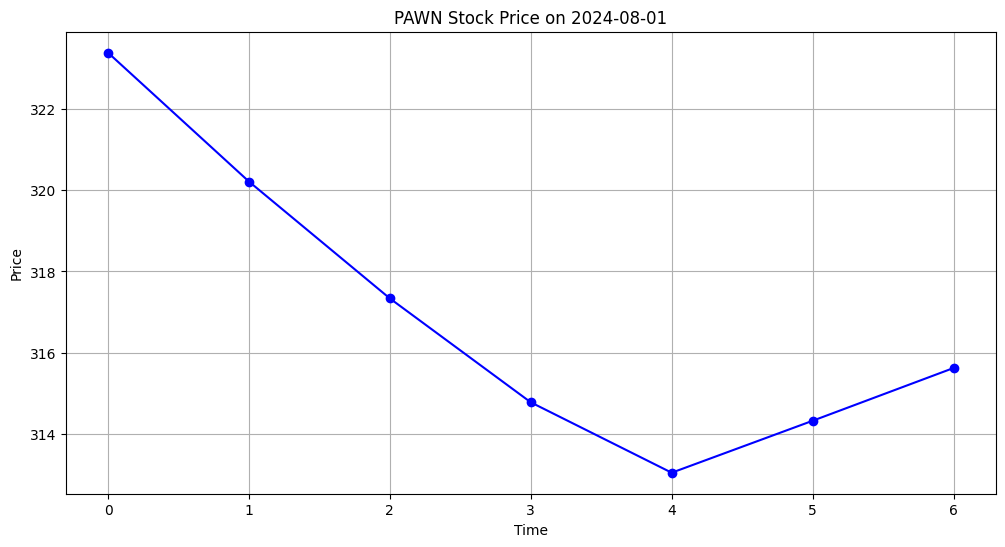

In [13]:
single_day_data = daily_closing_prices[datetime.date.fromisoformat('2024-08-01')]  # Replace with the desired date
# single_day_data.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(single_day_data, marker='o', linestyle='-', color='blue')
plt.title("PAWN Stock Price on 2024-08-01")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [14]:
data

,Open,High,Low,Close,Adj Close,Volume,Date
Datetime,,,,,,,
2023-08-15 09:30:00-04:00,218.490005,219.539993,216.750000,216.970001,216.970001,478397,2023-08-15
2023-08-15 10:30:00-04:00,216.860001,218.320007,216.322906,217.865204,217.865204,396296,2023-08-15
2023-08-15 11:30:00-04:00,217.850006,218.880005,217.590103,217.759995,217.759995,274399,2023-08-15
2023-08-15 12:30:00-04:00,217.779999,218.210007,217.418900,217.440002,217.440002,187651,2023-08-15
2023-08-15 13:30:00-04:00,217.380005,217.449997,216.009995,216.119995,216.119995,213439,2023-08-15
...,...,...,...,...,...,...,...
2024-08-14 11:30:00-04:00,340.000000,344.332703,339.850098,341.480011,341.480011,391210,2024-08-14
2024-08-14 12:30:00-04:00,341.515991,341.689911,339.600006,341.500000,341.500000,203295,2024-08-14
2024-08-14 13:30:00-04:00,341.589996,341.589996,339.779999,340.380005,340.380005,119985,2024-08-14


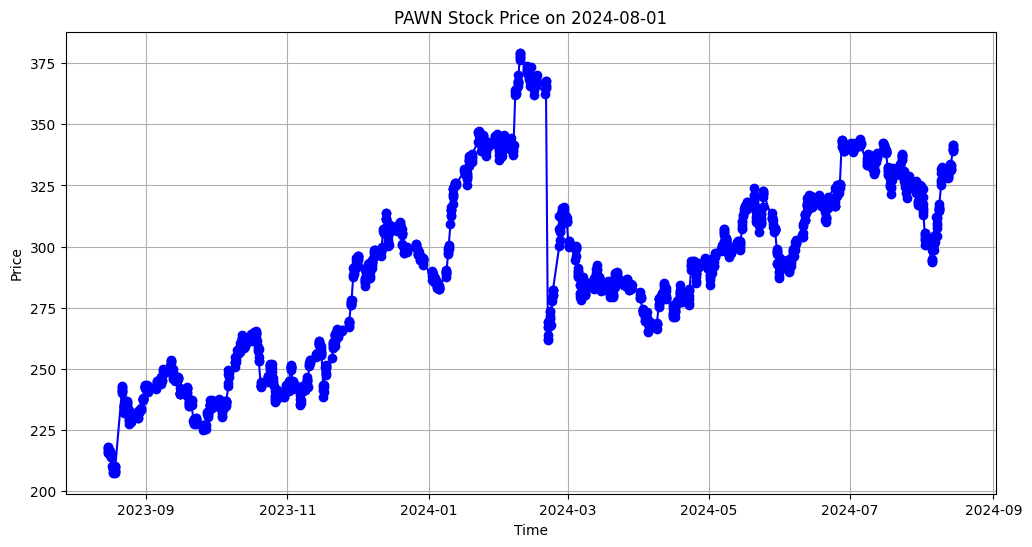

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], marker='o', linestyle='-', color='blue')
plt.title("PAWN Stock Price on 2024-08-01")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [17]:
# Function to calculate differentials for each day
def calculate_differentials(day_data):
    return np.diff(day_data)

In [18]:
# Apply the differential calculation to each day's data
daily_differentials = daily_closing_prices.apply(calculate_differentials)

In [19]:
daily_differentials

Date
2023-08-15    [0.89520263671875, -0.1052093505859375, -0.319...
2023-08-16    [1.0500030517578125, -0.7100067138671875, -0.9...
2023-08-17    [-1.1199951171875, 1.0699920654296875, -0.8149...
2023-08-18    [0.7700042724609375, -0.3600006103515625, 0.75...
2023-08-21    [2.3238983154296875, 0.6414947509765625, -1.75...
                                    ...                        
2024-08-08    [-1.079986572265625, 0.600006103515625, 0.5368...
2024-08-09    [1.1387939453125, 0.766204833984375, 4.7900085...
2024-08-12    [-0.329986572265625, 1.260009765625, 0.1299743...
2024-08-13    [1.489990234375, -1.79998779296875, -0.5500183...
2024-08-14    [0.57000732421875, 1.670013427734375, 0.019989...
Name: Close, Length: 252, dtype: object

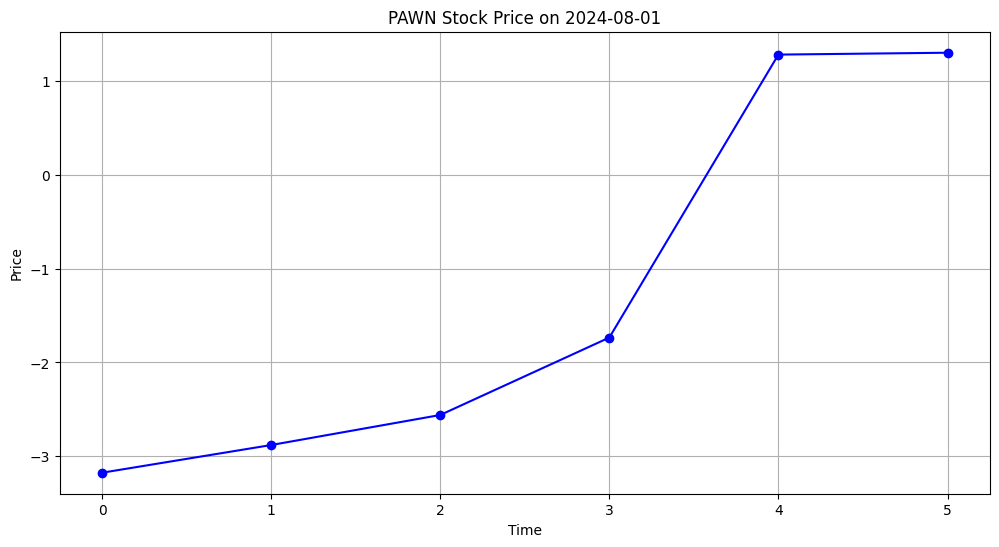

In [21]:
plt.figure(figsize=(12, 6))
# plt.plot(single_day_data, marker='o', linestyle='-', color='blue')
plt.plot(daily_differentials[datetime.date.fromisoformat('2024-08-01')], marker='o', linestyle='-', color='blue')
plt.title("PAWN Stock Price on 2024-08-01")
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid(True)
plt.show()

[*********************100%%**********************]  1 of 1 completed


                   0         1         2         3         4         5  \
Date                                                                     
2022-10-17 -1.968639 -0.226757  0.586991  1.177203  0.568948 -0.137746   
2022-10-18 -1.968402  1.015282  0.296553  0.242169 -0.449362  0.863761   
2022-10-19 -1.011505  0.224253 -0.295701  1.238841 -1.360958  1.205070   
2022-10-20 -0.481592 -0.550380 -0.813072 -0.719241  1.988888  0.575397   
2022-10-21  1.000929 -1.005298  1.250074 -0.979087  0.712467 -0.979087   

            Cluster  
Date                 
2022-10-17        9  
2022-10-18        9  
2022-10-19        7  
2022-10-20       14  
2022-10-21       19  


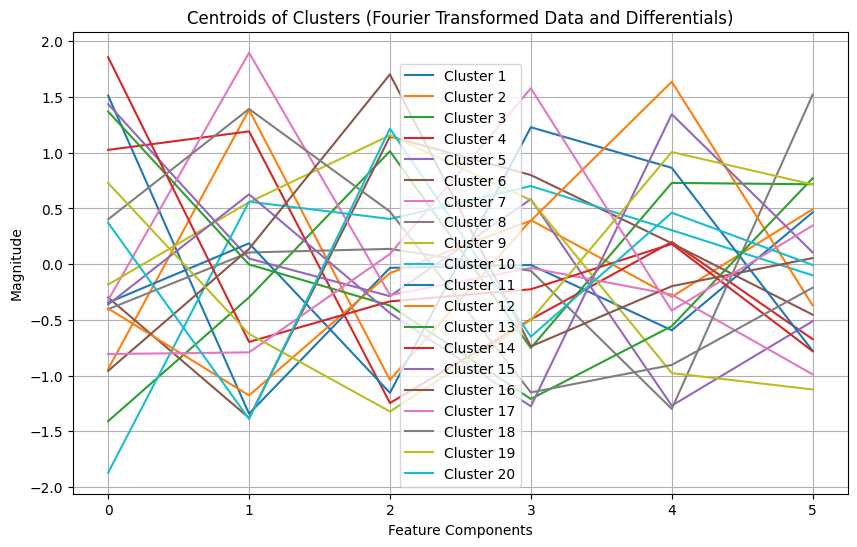

In [78]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.fft import fft
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Download 1 year of data for PANW stock at 1-hour resolution
ticker = "PANW"
data = yf.download(tickers=ticker, start="2022-10-15", end="2024-05-10", interval="1h")

# Ensure there's a 'Date' column
data['Date'] = data.index.date

# 2. Calculate the daily closing price and differentials for each day

# Group by date and collect closing prices into a list
daily_closing_prices = data.groupby('Date')['Close'].apply(list)

# Calculate differentials (first differences)
daily_differentials = daily_closing_prices.apply(lambda x: np.diff(x))

# Remove days with incomplete data
valid_days = daily_differentials[daily_differentials.apply(len) == len(daily_differentials.iloc[0])].index
daily_closing_prices = daily_closing_prices.loc[valid_days]
daily_differentials = daily_differentials.loc[valid_days]

# 3. Scale the data (standardization)
scaler = StandardScaler()

# Apply scaling to daily closing prices (individually for each day)
scaled_closing_prices = daily_closing_prices.apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())

# Apply scaling to daily differentials (individually for each day)
scaled_differentials = daily_differentials.apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())

# 4. Apply Fourier Transform to both scaled prices and differentials

# Fourier Transform on scaled closing prices
fourier_closing_prices = scaled_closing_prices.apply(lambda x: np.abs(fft(x))[:len(x)//2])

# Fourier Transform on scaled differentials
fourier_differentials = scaled_differentials.apply(lambda x: np.abs(fft(x))[:len(x)//2])

# Convert both to DataFrames
fourier_closing_prices_df = pd.DataFrame(fourier_closing_prices.tolist(), index=scaled_closing_prices.index)
fourier_differentials_df = pd.DataFrame(fourier_differentials.tolist(), index=scaled_differentials.index)

# 5. Combine both Fourier Transformed vectors and scaled differentials into a single feature set

# Concatenate the Fourier-transformed vectors and the scaled differentials, fourier_closing_prices_df, fourier_differentials_df,
combined_features_df = pd.concat([scaled_differentials.apply(pd.Series)], axis=1)

# Drop any rows with NaN values (in case of incomplete data after Fourier Transform)
combined_features_df.dropna(inplace=True)

# 6. Perform clustering on the combined feature vectors

# Assuming we want to cluster into 3 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(combined_features_df)

# Add the cluster labels to the DataFrame
combined_features_df['Cluster'] = clusters

# Print the combined DataFrame with cluster labels
print(combined_features_df.head())

# 7. Plot the centroid of each cluster
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
for i, centroid in enumerate(centroids):
    plt.plot(centroid, label=f'Cluster {i+1}')

plt.title('Centroids of Clusters (Fourier Transformed Data and Differentials)')
plt.xlabel('Feature Components')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
combined_features_df.loc[combined_features_df.index[0]].reset_index(drop=True)[:6]

0    2.997602e-14
1    4.894374e+00
2    6.454374e-01
3    1.110223e-16
4    4.003999e+00
5    1.169097e+00
Name: 2023-08-15, dtype: float64

In [32]:
combined_features_df.index[0]

datetime.date(2023, 8, 15)

/var/folders/gr/gh8bm86131s7lgz6qymym3w40000gp/T/ipykernel_75036/46850381.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


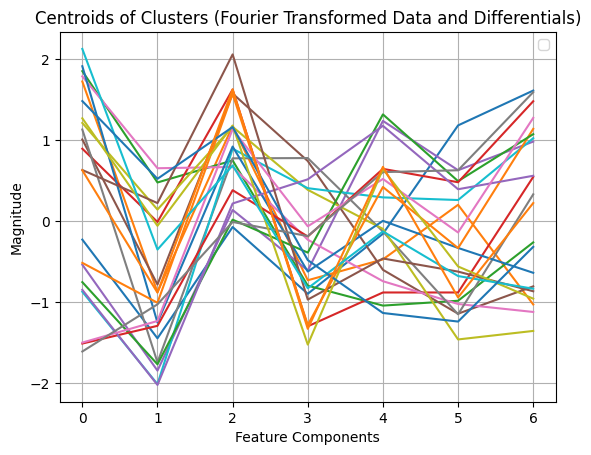

In [80]:


for row in scaled_closing_prices[combined_features_df['Cluster'] == 1]:
    plt.plot(row)

plt.title('Centroids of Clusters (Fourier Transformed Data and Differentials)')
plt.xlabel('Feature Components')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()